## Definicao do problema

Este notebook objetiva explorar a base dados "Ocorrências Aeronáuticas na Aviação Civil Brasileira", disponível em : https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira. Produzindo insights e os processos usados para alcança-los.


A base de dados contem ocorrencias aeronauticas entre os anos de 2012 a 2021 que ocorreram em solo brasileiro. Segundo a própria descrição da base, esta é organizada em 5 tabelas da forma:
- OCORRÊNCIA.csv - Informações sobre as ocorrências.
- OCORRÊNCIA_TIPO.csv - Informações sobre o tipo de ocorrência.
- AERONAVE.csv - Informações sobre as aeronaves envolvidas nas ocorrências.
- FATOR_CONTRIBUINTE.csv - Informações sobre os fatores contribuinte das ocorrências que tiveram investigações finalizadas.
- RECOMENDAÇÃO.csv - Informações sobre as recomendações de segurança geradas nas ocorrências.

seguindo o modelo disponível em: http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/modelo_dados.png


feito por: Arthur Silva

------------------

#### Imports

In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
# from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

#### Leitura das bases

In [186]:
df_ocorrecias = pd.read_csv("dados/raw/ocorrencia.csv",sep=";")
df_tipo_ocorrecias = pd.read_csv("dados/raw/ocorrencia_tipo.csv",sep=";")
df_fator_contribuinte = pd.read_csv("dados/raw/fator_contribuinte.csv",sep=";")
df_aeronaves = pd.read_csv("dados/raw/aeronave.csv",sep=";")

print("Ocorrencias: ",df_ocorrecias.shape)
print("Tipo Ocorrecias: ",df_tipo_ocorrecias.shape)
print("Fator Contribuinte: ",df_fator_contribuinte.shape)
print("Aeronaves: ",df_aeronaves.shape)


Ocorrencias:  (5167, 22)
Tipo Ocorrecias:  (5347, 4)
Fator Contribuinte:  (3464, 5)
Aeronaves:  (5235, 23)


--------------

## Exploração e definição de hipóteses


Esta etapa visa tentar entender um pouco de cada bases de dados criar hipoteses e tentar responde-las

#### df_tipo_ocorrecias

A base de ocorrencia visa definir dentre quais foram as causas das ocorrencias geradas

In [187]:
df_tipo_ocorrecias.head(3)

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR
1,45332,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G
2,45333,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP


In [188]:
# existe a mesma quantidade de tipos de ocorrencia, desta forma apenas uma destas colunas é necessária.
print(df_tipo_ocorrecias.ocorrencia_tipo.nunique())
print(df_tipo_ocorrecias.ocorrencia_tipo.nunique() == df_tipo_ocorrecias.ocorrencia_tipo_categoria.nunique())

80
True


In [189]:
# existe apenas uma linha nan
print(df_tipo_ocorrecias.isna().sum())
df_tipo_ocorrecias[df_tipo_ocorrecias.ocorrencia_tipo.isna()]

codigo_ocorrencia1           0
ocorrencia_tipo              1
ocorrencia_tipo_categoria    1
taxonomia_tipo_icao          1
dtype: int64


,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
3730,78527,NaN,NaN,NaN


In [190]:
# colunas a serem usadas
df_tipo_ocorrecias = df_tipo_ocorrecias[['codigo_ocorrencia1','ocorrencia_tipo']]

Existem 80 tipos de ocorrencia unicos dentre os 10 principais varios são relacionadas a problemas mecanicos

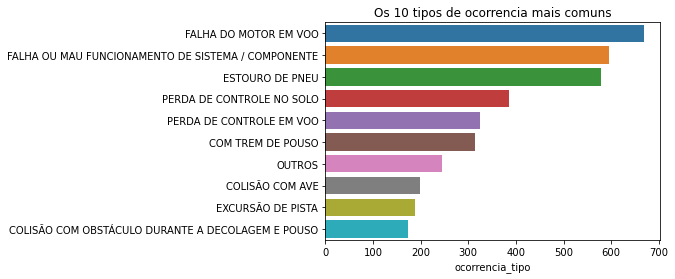

In [191]:
temp = pd.DataFrame(df_tipo_ocorrecias.ocorrencia_tipo.value_counts(sort= True,  ascending = False))
plt.title("Os 10 tipos de ocorrencia mais comuns")
sns.barplot(y=temp.index[:10], x=temp.ocorrencia_tipo[:10])
del(temp)

#### df_fator_contribuinte

Os fatores contribuintes são fatores concomitantes a ocorrencia. Eles não são os causadores, mas estão associados ao evento.

In [192]:
df_fator_contribuinte.shape

(3464, 5)

In [193]:
df_fator_contribuinte.head(3)

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,45331,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,45331,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
2,45331,CAPACITAÇÃO E TREINAMENTO,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO


É importante observar que a base de Fator Contribuinte é significativamente menor do que as outras. Muito provavelmente nem todos os eventos tiveram fatores contribuintes detectados ou que influenciassem a ocorrencia.

A marioria dos fatores  sao operacionais e fatores humanos; em sua maioria relacionados ao desempenho humano(fator aspecto)

In [194]:
# varios fatores nao tem condicionantes
df_fator_contribuinte.groupby(['fator_condicionante','fator_area','fator_aspecto']).size().sort_values(ascending=False).to_frame(name='quantidade')

quantidade
fator_condicionante                    fator_area        fator_aspecto                                             
OPERAÇÃO DA AERONAVE                   FATOR OPERACIONAL DESEMPENHO DO SER HUMANO                              1800
INDIVIDUAL                             FATOR HUMANO      ASPECTO PSICOLÓGICO                                    674
ORGANIZACIONAL                         FATOR HUMANO      ASPECTO PSICOLÓGICO                                    293
MANUTENÇÃO DA AERONAVE                 FATOR OPERACIONAL DESEMPENHO DO SER HUMANO                               213
PSICOSSOCIAL                           FATOR HUMANO      ASPECTO PSICOLÓGICO                                    105
***                                    FATOR OPERACIONAL ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL          96
                                       FATOR HUMANO      ASPECTO MÉDICO                                          69
                                       FATOR OPERACIONAL INFRAESTRUTURA AEROPORTUÁRIA                            66
                                       OUTRO             OUTRO                                                   62
PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO FATOR OPERACIONAL DESEMPENHO DO SER HUMANO                                25
***                                    ***               ***                                                     19
                                       FATOR HUMANO      ERGONOMIA                                               10
                                       FATOR MATERIAL    ASPECTO DE PROJETO                                      10
                                       FATOR OPERACIONAL INFRAESTRUTURA DE TRÁFEGO AÉREO                          9
                                       FATOR MATERIAL    ASPECTO DE FABRICAÇÃO                                    8
                                                         ASPECTO DE MANUSEIO DO MATERIAL                          5

Será que falta de experiencia de pilotos bem como fatores de fadiga estao relacionados as ocorrencias?

Embora a maioria das ocorrencias seja por problemas mecânicos, aqui é notavel que a vasta maioria dos fatores contribuintes são problemas operacionais estão vinculadas ao desempenho humano

O fator fadiga, embora seja um aspecto médico não existe em quantidade significativa como contribuidor das ocorrencias. Embora considerando-se aspectos pscicológicos, fatores como : PROCESSO DECISÓRIO,PERCEPÇÃO e ATENÇÃO que lideram as ocorrencias deste subgrupo podem ser associadas a eventos de fadiga.

Seria interessante comparar a ocorrencias destes fatores e a duração dos voos mas a base não oferece dados para permitir esta comparação.

In [332]:
df_fator_contribuinte[df_fator_contribuinte.fator_aspecto =='ASPECTO PSICOLÓGICO'].fator_nome.value_counts().to_frame(name='quantidade').head(20)

,quantidade
PROCESSO DECISÓRIO,189
ATITUDE,168
PERCEPÇÃO,126
ATENÇÃO,83
PROCESSOS ORGANIZACIONAIS,73
SISTEMAS DE APOIO,63
CAPACITAÇÃO E TREINAMENTO,62
CULTURA ORGANIZACIONAL,45
MEMÓRIA,40
CULTURA DO GRUPO DE TRABALHO,36


In [196]:
df_fator_contribuinte[df_fator_contribuinte.fator_nome =='FADIGA']

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
457,46583,FADIGA,ASPECTO MÉDICO,***,FATOR HUMANO
506,46751,FADIGA,ASPECTO MÉDICO,***,FATOR HUMANO
553,46916,FADIGA,ASPECTO MÉDICO,***,FATOR HUMANO
1231,51416,FADIGA,ASPECTO MÉDICO,***,FATOR HUMANO
1364,52265,FADIGA,ASPECTO MÉDICO,***,FATOR HUMANO
1986,53576,FADIGA,ASPECTO MÉDICO,***,FATOR HUMANO
2282,66078,FADIGA,ASPECTO MÉDICO,***,FATOR HUMANO
2526,77276,FADIGA,ASPECTO MÉDICO,***,FATOR HUMANO
2710,77695,FADIGA,ASPECTO MÉDICO,***,FATOR HUMANO
2793,77789,FADIGA,ASPECTO MÉDICO,***,FATOR HUMANO


Já a falta de experiencia dos pilotos é o 8º fator mais contribuinte para ocrrencias. Se considerarmos que a capacidade de julgamento é associada a experiência, este número é ainda maior.

In [197]:
df_fator_contribuinte.groupby(["fator_nome",'fator_area','fator_aspecto']).size().sort_values(ascending=False).to_frame(name='quantidade')[:20]

,,,quantidade
fator_nome,fator_area,fator_aspecto,
JULGAMENTO DE PILOTAGEM,FATOR OPERACIONAL,DESEMPENHO DO SER HUMANO,472
APLICAÇÃO DE COMANDOS,FATOR OPERACIONAL,DESEMPENHO DO SER HUMANO,327
PLANEJAMENTO DE VOO,FATOR OPERACIONAL,DESEMPENHO DO SER HUMANO,256
SUPERVISÃO GERENCIAL,FATOR OPERACIONAL,DESEMPENHO DO SER HUMANO,234
MANUTENÇÃO DA AERONAVE,FATOR OPERACIONAL,DESEMPENHO DO SER HUMANO,213
PROCESSO DECISÓRIO,FATOR HUMANO,ASPECTO PSICOLÓGICO,189
ATITUDE,FATOR HUMANO,ASPECTO PSICOLÓGICO,168
POUCA EXPERIÊNCIA DO PILOTO,FATOR OPERACIONAL,DESEMPENHO DO SER HUMANO,148
PERCEPÇÃO,FATOR HUMANO,ASPECTO PSICOLÓGICO,126


 58% dos eventos contribuintes estão relacionados a desempenho humano, especialmente:
    - JULGAMENTO DE PILOTAGEM, APLICAÇÃO DE COMANDOS, PLANEJAMENTO DE VOO, SUPERVISÃO GERENCIAL    

In [198]:
df_fator_contribuinte.groupby(["fator_aspecto"]).size().sort_values(ascending=False).to_frame(name='quantidade')[:20]

,quantidade
fator_aspecto,
DESEMPENHO DO SER HUMANO,2038
ASPECTO PSICOLÓGICO,1072
ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL,96
ASPECTO MÉDICO,69
INFRAESTRUTURA AEROPORTUÁRIA,66
OUTRO,62
***,19
ASPECTO DE PROJETO,10
ERGONOMIA,10


In [199]:
# percentual de aspectos associados a desmplenho humano
2038 / df_fator_contribuinte.shape[0]

0.5883371824480369

Sera que existem fatores contribuintes nao associados a falhas mecanicas?

#### df_aeronaves

A base de aeronaves, descreve varias características da(s) aeronave(s) envolvida(s) na ocorrencia. 
Permitindo um entendimento melhor sobre idade das aeronaves, marca, tipo de motor entre outros

A marioria dos eventos sao de avioes (como esperado, pois existem mais avioes)

existe ainda uma quantidade relevante de eventos em que não há informacao de tipo de veiculo

In [200]:
df_aeronaves['aeronave_tipo_veiculo'].value_counts().to_frame(name='quantidade')

,quantidade
AVIÃO,4188
HELICÓPTERO,550
ULTRALEVE,304
***,155
PLANADOR,17
ANFÍBIO,12
TRIKE,5
DIRIGÍVEL,2
BALÃO,1
HIDROAVIÃO,1


Exceto pela classe majoritaria(aviao) todos os veiculos tem em sua maioria menos de 20 anos

Veiculos novos em geral, teoricamente, demoram mais para ter falhas mecanicas, será que para veiculos de ate 20 anos é mais comum falhas homanas?

In [201]:
# calculando idade das aeronaves
df_aeronaves['idade_aeronave'] = 2021 - df_aeronaves.aeronave_ano_fabricacao

<AxesSubplot:title={'center':'Idade aeronaves'}, xlabel='aeronave_tipo_veiculo', ylabel='idade_aeronave'>

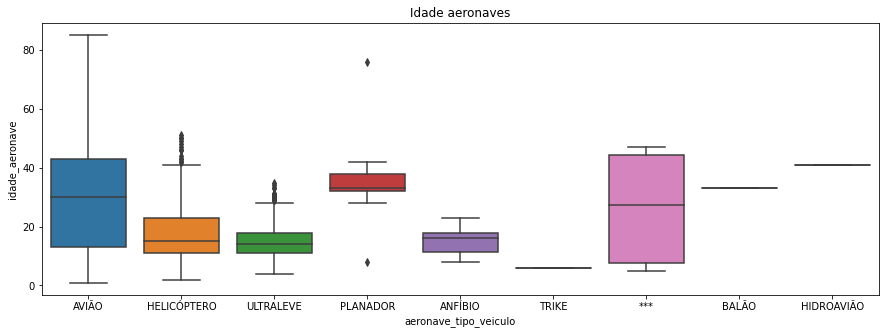

In [202]:
plt.figure(figsize=(15, 5))
plt.title("Idade aeronaves")
sns.boxplot(data = df_aeronaves[df_aeronaves.aeronave_ano_fabricacao.between(1900, 2023)],
            y = "idade_aeronave", x= 'aeronave_tipo_veiculo')

Agrupando os eventos de origem e destino é possivel notar que a grande maioria dos eventos acontecem fora de Aerodromos. 
Além disso quando em Aerodromos, grande parte das ocorrencias nao acontecem em viagens entre aerodromos.

In [203]:
df_aeronaves.groupby(by=["aeronave_voo_origem","aeronave_voo_destino"]).size().reset_index().sort_values(by=0,ascending=False).head(20)

,aeronave_voo_origem,aeronave_voo_destino,0
947,FORA DE AERODROMO,FORA DE AERODROMO,1792
0,***,***,135
397,CAMPO DE MARTE,CAMPO DE MARTE,53
107,AEROPORTO ESTADUAL DE JUNDIAÍ,AEROPORTO ESTADUAL DE JUNDIAÍ,34
744,ESTADUAL ARTHUR SIQUEIRA,ESTADUAL ARTHUR SIQUEIRA,30
138,AERÓDROMO NACIONAL DE AVIAÇÃO,AERÓDROMO NACIONAL DE AVIAÇÃO,27
1108,GOVERNADOR JOSÉ RICHA,GOVERNADOR JOSÉ RICHA,26
258,BACACHERI,BACACHERI,25
504,CARLOS PRATES,CARLOS PRATES,20
1579,PISTA DE POUSO EVENTUAL,PISTA DE POUSO EVENTUAL,20


- Em que fase da operacao as ocorrencias sao mais comuns?
- Alguma operação tem mais dificuldade em alguma fase específica?
- Que tipo de aeronave tem mais acidentes?

Avioes sofreram mais acidentes no período observado, e em geral aeronaves movidas a pistao

<AxesSubplot:xlabel='aeronave_tipo_veiculo', ylabel='count'>

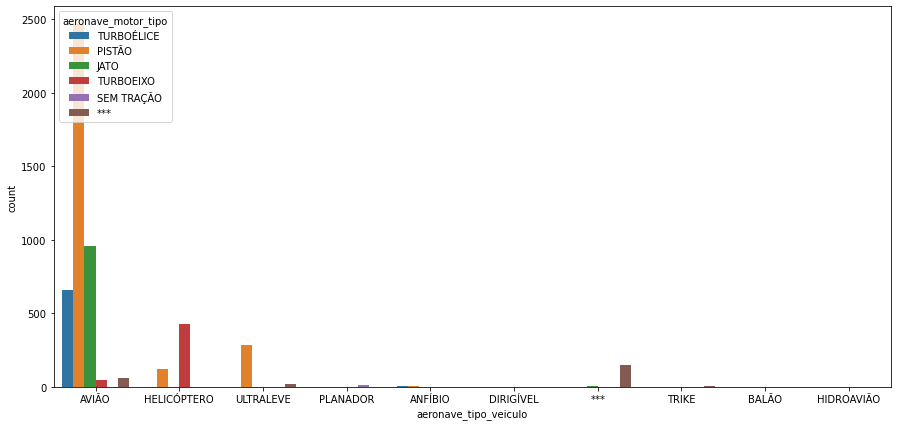

In [204]:
plt.figure(figsize=(15, 7))

a = df_aeronaves[['aeronave_tipo_veiculo','aeronave_motor_tipo']]
sns.countplot(data = a,x='aeronave_tipo_veiculo',hue = 'aeronave_motor_tipo')

10 marcas com mais acidentes associados em modelos movidos a pistao

In [205]:
temp = df_aeronaves[['aeronave_fabricante','aeronave_motor_tipo']]
temp = pd.pivot_table(temp, index="aeronave_fabricante",
                      columns='aeronave_motor_tipo',
                      aggfunc=len, fill_value=0).sort_values(by="PISTÃO",
                                                             ascending=False)
temp.head()

aeronave_motor_tipo,***,JATO,PISTÃO,SEM TRAÇÃO,TURBOEIXO,TURBOÉLICE
aeronave_fabricante,,,,,,
CESSNA AIRCRAFT,10,99,642,0,0,87
NEIVA INDUSTRIA AERONAUTICA,0,0,583,0,0,0
PIPER AIRCRAFT,3,0,321,0,0,57
EMBRAER,6,256,250,0,31,39
BEECH AIRCRAFT,1,2,199,0,0,52


As fases de maior numero de ocorrencias sao cruzeiro, decolagem e pouso. Isto se comunica diretamente com os 10 tipos ocorrencias mais comuns visualizados em "df_tipo_ocorrecias"

Abaixo sao relaciodos os momentos em que as ocorrencias aconteceram com o tipo de aeronave. Removi a classe Avião pois esta é majoritaria em todos os momentos e dificultava a leitura do grafico

Em geral aeronves compartilham problemas nas mesmas fases. Ainda ssim é possivel notar que helicópteros tem muito mais ocorrencias durante o cruzeiro se comparado a quantidade de ocorrencias nas mesmas fases. Outro ponto visível é que veículos anfpibios tem mais ocorrencias durante o pouso do que planadores.

<AxesSubplot:xlabel='count', ylabel='aeronave_fase_operacao'>

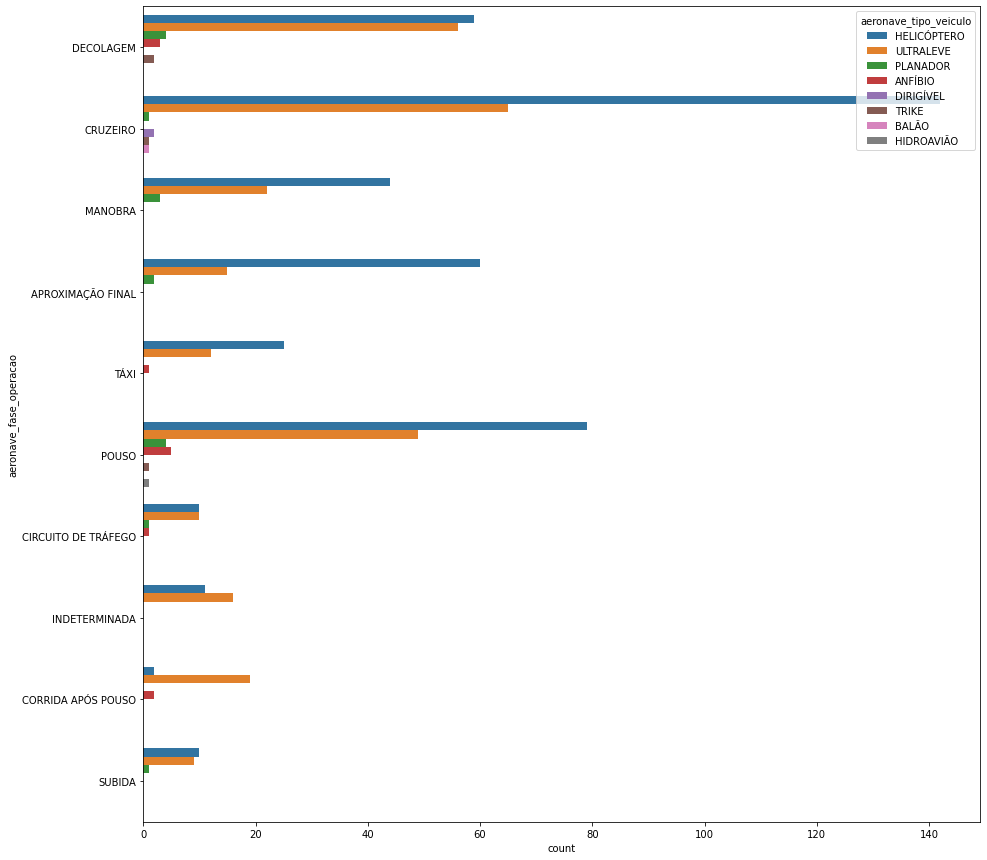

In [206]:
plt.figure(figsize=(15, 15))

fase = df_aeronaves[df_aeronaves.aeronave_tipo_veiculo != "AVIÃO"].aeronave_fase_operacao.value_counts().index[:10]
temp = df_aeronaves[df_aeronaves.aeronave_fase_operacao.isin(fase)]
temp = temp[(temp.aeronave_tipo_veiculo != "AVIÃO") & (temp.aeronave_tipo_veiculo != "***")]

sns.countplot(data = temp, y='aeronave_fase_operacao',hue='aeronave_tipo_veiculo')

Tipos de aviao com maior numero de acidentes

<AxesSubplot:>

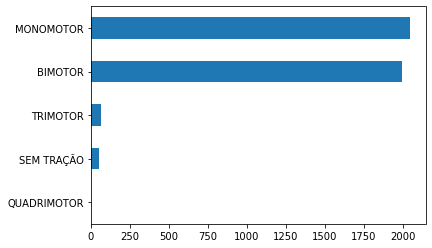

In [207]:
df_aeronaves[(df_aeronaves.aeronave_tipo_veiculo == "AVIÃO") & (df_aeronaves.aeronave_motor_quantidade != "***")].aeronave_motor_quantidade.value_counts().sort_values().plot(kind = 'barh')

Marcas de aviao com maior numero de acidentes

In [333]:
df_aeronaves[df_aeronaves.aeronave_tipo_veiculo == "AVIÃO"].aeronave_fabricante.value_counts().to_frame(name='quantidade')

,quantidade
CESSNA AIRCRAFT,828
NEIVA INDUSTRIA AERONAUTICA,583
EMBRAER,582
PIPER AIRCRAFT,380
BOEING COMPANY,262
...,...
CLAIBER VIEIRA BORGES,1
ALLIANCE AIRCRAFT,1
FABRICAÇÃO PRÓPRIA,1
ROGER AGNELLI,1


<AxesSubplot:title={'center':'Top 20 marcas com maior numero de acidentes'}>

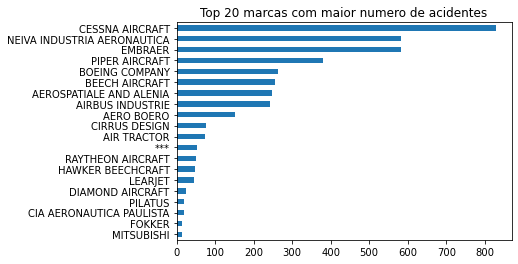

In [324]:
df_aeronaves[df_aeronaves.aeronave_tipo_veiculo == "AVIÃO"].aeronave_fabricante.value_counts().head(20).sort_values().plot(kind = 'barh', title = "Top 20 marcas com maior numero de acidentes")

<AxesSubplot:title={'center':'Marcas de aviao que tiveram mais ocorrencias'}, xlabel='count', ylabel='aeronave_fabricante'>

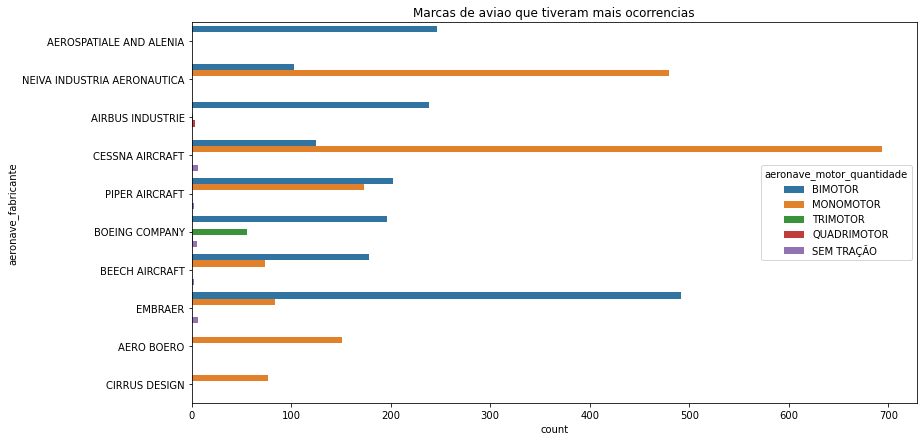

In [209]:
# como existem muitas classes tanto de marcas quanto de tipo de aeronave optei por focar no tipo mais comum e no top 10
plt.figure(figsize=(13, 7))
plt.title("Marcas de aviao que tiveram mais ocorrencias")
marcas = df_aeronaves[(df_aeronaves.aeronave_tipo_veiculo == "AVIÃO")].aeronave_fabricante.value_counts().index[:10]

sns.countplot(data = df_aeronaves[(df_aeronaves.aeronave_tipo_veiculo == "AVIÃO") &
                                  (df_aeronaves.aeronave_motor_quantidade != "***") &
                                 (df_aeronaves.aeronave_fabricante.isin(marcas))],
             y ='aeronave_fabricante', hue='aeronave_motor_quantidade')

Pesquisando um pouco pelas empresas listadas temos:
- Aerospatiale and Alenia é uma empresa italiana focada na produção de hélice militares, de patrulha e modelos turboélice Regional.
- Neiva, é uma empresa brasileira focada em aviões para agricultura
- Embraer é uma empresa brasileira, uma das maiores produtoras de aeronaves do mundo

É possivel notar a grande presenca de monomotores nos ocorrencias e algumas marcas mais pontuais como a Embraer tendo mais problemas com Bimotores

No geral Cessna, Neiva e Embraer lideram o numero de ocorrencias

Aeronaves mais velhas são mais propensas a se envolver em acidentes?

Conferindo a quantidade de ocorrencia por idade de aeronaves é possivel notar que um grande numero de ocorrencias acontece com aeronaves entre 9 e 13 anos

<AxesSubplot:title={'center':'Top 20 idade das aeronaves com maior numero de acidentes'}>

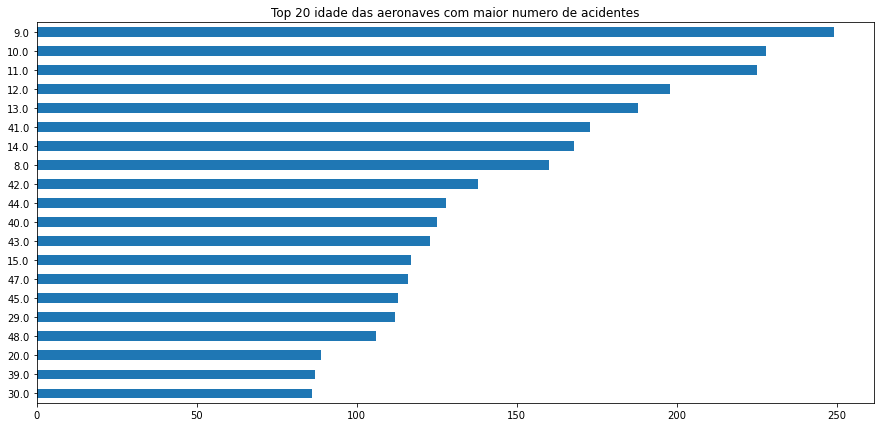

In [210]:
plt.figure(figsize=(15, 7))

df_aeronaves[(df_aeronaves.idade_aeronave >0) &
             (df_aeronaves.idade_aeronave < 150)].idade_aeronave.value_counts().head(20).sort_values().plot(kind = 'barh',
                                                                                                   title = "Top 20 idade das aeronaves com maior numero de acidentes")

Aeronaves de 9 anos de idade estao mais envolvidas em ocorrencias do que aeronaves mais velhas, por que?

Existem um aumento significativo de ocorrencias com modelos de aviao bimotor, fabricados pela AEROSPATIALE AND ALENIA no ano de 2012(atualmente com 9 anos); especialmente durante as fases de cruzeiro e decolagem.

Observando notícias da época nao existem indicios de problemas na fabricação de aeronaves bimotores da Aerospatiale ou Embraer.

Após a uniao das bases será possivel notar quandos estes eventos ocorreram

In [211]:
temp_9_anos= df_aeronaves[(df_aeronaves.idade_aeronave == 9)]
temp_10_anos = df_aeronaves[(df_aeronaves.idade_aeronave == 10)]

In [335]:
# Comparando numeros de ocorrencias para veiculos de 10 e 9 anos por tipo
print('aeronaves de 10 anos')
print(temp_10_anos.aeronave_tipo_veiculo.value_counts())

print('aeronaves de 9 anos')
print(temp_9_anos.aeronave_tipo_veiculo.value_counts())
# ocorreu um aumento no numero de ocorrencias de avioes

aeronaves de 10 anos
AVIÃO          167
HELICÓPTERO     34
ULTRALEVE       27
Name: aeronave_tipo_veiculo, dtype: int64
aeronaves de 9 anos
AVIÃO          202
HELICÓPTERO     28
ULTRALEVE       18
ANFÍBIO          1
Name: aeronave_tipo_veiculo, dtype: int64


In [213]:
# Comparando numeros de ocorrencias para veiculos de 10 e 9 anos por tipo de motor

print('aeronaves de 10 anos')
print(temp_10_anos.aeronave_motor_quantidade.value_counts())

print('aeronaves de 9 anos')
print(temp_9_anos.aeronave_motor_quantidade.value_counts())
# ocorreu um aumento no numero de ocorrencias de bimotores

aeronaves de 10 anos
BIMOTOR      130
MONOMOTOR     97
***            1
Name: aeronave_motor_quantidade, dtype: int64
aeronaves de 9 anos
BIMOTOR      157
MONOMOTOR     90
***            1
TRIMOTOR       1
Name: aeronave_motor_quantidade, dtype: int64


In [214]:
# Comparando numeros de ocorrencias para veiculos de 10 e 9 anos por fabricante

print('aeronaves de 10 anos')
print(temp_10_anos.aeronave_fabricante.value_counts().head(5))
print('aeronaves de 9 anos')
print(temp_9_anos.aeronave_fabricante.value_counts().head(5))
# ocorreu um aumento no numero de ocorrencias de avioes, bimotores produzidos pela AEROSPATIALE AND ALENIA e EMBRAER 

aeronaves de 10 anos
EMBRAER                    75
AEROSPATIALE AND ALENIA    23
AIRBUS INDUSTRIE           13
SIKORSKY AIRCRAFT          10
PIPER AIRCRAFT              9
Name: aeronave_fabricante, dtype: int64
aeronaves de 9 anos
EMBRAER                    63
AEROSPATIALE AND ALENIA    58
BOEING COMPANY             16
AIRBUS INDUSTRIE           15
ROBINSON HELICOPTER        11
Name: aeronave_fabricante, dtype: int64


In [215]:
print('aeronaves de 10 anos')
print(temp_10_anos.aeronave_fase_operacao.value_counts().head(5))
print('aeronaves de 9 anos')
print(temp_9_anos.aeronave_fase_operacao.value_counts().head(5))

aeronaves de 10 anos
DECOLAGEM             44
CRUZEIRO              40
SUBIDA                28
POUSO                 28
CORRIDA APÓS POUSO    22
Name: aeronave_fase_operacao, dtype: int64
aeronaves de 9 anos
CRUZEIRO              57
DECOLAGEM             45
POUSO                 26
SUBIDA                24
CORRIDA APÓS POUSO    21
Name: aeronave_fase_operacao, dtype: int64


In [216]:
df_aeronaves = df_aeronaves[['codigo_ocorrencia2',"aeronave_tipo_veiculo",'aeronave_fase_operacao','aeronave_fabricante','aeronave_ano_fabricacao','aeronave_tipo_operacao','aeronave_nivel_dano','idade_aeronave' ]]

#### df_ocorrecias

Ocorrencias sao mais relacionadas a um resumo do evento: oferecendo dados sobre onde; quando; gravidade do evento e o que foi feito
- desta forma escolhi premissas relativas a, onde, quando e tipo do evento

In [217]:
df_ocorrecias.isna().sum()

codigo_ocorrencia                    0
codigo_ocorrencia1                   0
codigo_ocorrencia2                   0
codigo_ocorrencia3                   0
codigo_ocorrencia4                   0
ocorrencia_classificacao             0
ocorrencia_latitude                975
ocorrencia_longitude               975
ocorrencia_cidade                    0
ocorrencia_uf                        0
ocorrencia_pais                      0
ocorrencia_aerodromo                 0
ocorrencia_dia                       0
ocorrencia_hora                      1
investigacao_aeronave_liberada     166
investigacao_status                257
divulgacao_relatorio_numero        384
divulgacao_relatorio_publicado       0
divulgacao_dia_publicacao         3816
total_recomendacoes                  0
total_aeronaves_envolvidas           0
ocorrencia_saida_pista               0
dtype: int64

In [218]:
df_ocorrecias['ocorrencia_dia']  = pd.to_datetime(df_ocorrecias['ocorrencia_dia'])
df_ocorrecias['ocorrencia_ano'] = pd.to_datetime(df_ocorrecias['ocorrencia_dia']).apply(lambda x: int(x.strftime('%Y')))

A maioria das ocorrencias aconteceram no sudeste e sul, que são as regioes mais participantes do pib do país e tambem que contam com maior fluxos de pessoas, são regiões com maior volume de tráfico aéreo. Outro fator importante é que os aeroportos internacionais mais importantes do país estão no sudeste.

Vale ressaltar a enorme quantidade de ocorrencias em são paulo, embora um grande volume destes voos nao tenham um aerodromo identificado

Outro ponto interessante de observação é que embora 2020 e 2021 tivessem sido anos de reduzido volume de voos comerciais(por causa da pandemia) estes anos tiveram mais ocorrencias de acidentes do que todos os anos anteriores até 2015


<AxesSubplot:xlabel='ocorrencia_ano', ylabel='count'>

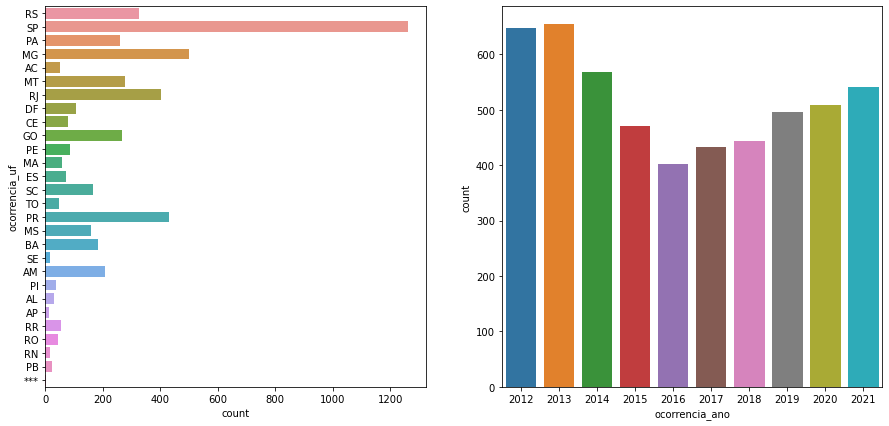

In [219]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.countplot(y=df_ocorrecias['ocorrencia_uf'] )


plt.subplot(1, 2, 2) # index 2
sns.countplot(x=df_ocorrecias['ocorrencia_ano'])


Ainda que SP concentre o numero de ocrrencias GO, PR e MT tem um numero relevante de acidentes graves

In [220]:
temp = df_ocorrecias[['ocorrencia_uf','ocorrencia_classificacao']]
temp = pd.pivot_table(temp, index="ocorrencia_uf",
                      columns='ocorrencia_classificacao',
                      aggfunc=len, fill_value=0).sort_values(by="INCIDENTE GRAVE",
                                                             ascending=False)
temp.head()

ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
ocorrencia_uf,,,
SP,348,781,132
MG,141,291,67
GO,114,88,66
PR,133,248,50
MT,157,72,47


In [221]:
df_ocorrecias[df_ocorrecias.ocorrencia_uf == "SP"].ocorrencia_aerodromo.value_counts()

****    332
SBGR    125
SBMT    121
SBKP     97
SBJD     74
       ... 
SNBR      1
SBPP      1
####      1
SIQK      1
SDUL      1
Name: ocorrencia_aerodromo, Length: 91, dtype: int64

In [222]:
df_ocorrecias.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_ano
0,52242,52242,52242,52242,52242,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,...,20:27:00,***,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2012
1,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,...,13:44:00,SIM,FINALIZADA,A-582/CENIPA/2014,SIM,2016-09-01,3,1,NÃO,2012
2,45333,45333,45333,45333,45333,ACIDENTE,***,***,VIAMÃO,RS,...,13:00:00,NaN,FINALIZADA,A-070/CENIPA/2013,SIM,2013-11-27,0,1,NÃO,2012
3,45401,45401,45401,45401,45401,ACIDENTE,***,***,SÃO SEBASTIÃO,SP,...,17:00:00,***,NaN,NaN,NÃO,NaN,0,1,NÃO,2012
4,45407,45407,45407,45407,45407,ACIDENTE,***,***,SÃO SEPÉ,RS,...,16:30:00,SIM,FINALIZADA,A-071/CENIPA/2013,SIM,2013-11-27,0,1,NÃO,2012


In [223]:
# selecionando colunas para manter
df_ocorrecias = df_ocorrecias[["codigo_ocorrencia",
                                "codigo_ocorrencia1",
                                "codigo_ocorrencia2",
                                "codigo_ocorrencia3",
                                "codigo_ocorrencia4",
                                "ocorrencia_dia",
                                "ocorrencia_uf",
                               "ocorrencia_cidade",
                                "ocorrencia_aerodromo",
                                "ocorrencia_classificacao"]]

### Unindo as bases

In [224]:
# o modelo de dados especifica como unir as tabelas
df_ocrrencia_aeronautica = pd.merge(df_ocorrecias, df_tipo_ocorrecias, how='left',left_on=['codigo_ocorrencia1'],right_on=['codigo_ocorrencia1']) 
df_ocrrencia_aeronautica = pd.merge(df_ocrrencia_aeronautica, df_fator_contribuinte, how='left',left_on=['codigo_ocorrencia3'],right_on=['codigo_ocorrencia3']) 
df_ocrrencia_aeronautica = pd.merge(df_ocrrencia_aeronautica, df_aeronaves, how='left',left_on=['codigo_ocorrencia2'],right_on=['codigo_ocorrencia2']) 
df_ocrrencia_aeronautica.drop(labels=['codigo_ocorrencia1', 'codigo_ocorrencia2', 'codigo_ocorrencia3', 'codigo_ocorrencia4'] ,axis=1 ,inplace=True)
df_ocrrencia_aeronautica.head()

,codigo_ocorrencia,ocorrencia_dia,ocorrencia_uf,ocorrencia_cidade,ocorrencia_aerodromo,ocorrencia_classificacao,ocorrencia_tipo,fator_nome,fator_aspecto,fator_condicionante,fator_area,aeronave_tipo_veiculo,aeronave_fase_operacao,aeronave_fabricante,aeronave_ano_fabricacao,aeronave_tipo_operacao,aeronave_nivel_dano,idade_aeronave
0,52242,2012-05-01,RS,PORTO ALEGRE,SBPA,INCIDENTE,ESTOURO DE PNEU,NaN,NaN,NaN,NaN,AVIÃO,POUSO,RAYTHEON AIRCRAFT,2003.0,PRIVADA,LEVE,18.0
1,45331,2012-06-01,SP,GUARULHOS,SBGR,ACIDENTE,COM PESSOAL EM VOO,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,AVIÃO,DESCIDA,AEROSPATIALE AND ALENIA,2001.0,REGULAR,NENHUM,20.0
2,45331,2012-06-01,SP,GUARULHOS,SBGR,ACIDENTE,COM PESSOAL EM VOO,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO,AVIÃO,DESCIDA,AEROSPATIALE AND ALENIA,2001.0,REGULAR,NENHUM,20.0
3,45331,2012-06-01,SP,GUARULHOS,SBGR,ACIDENTE,COM PESSOAL EM VOO,CAPACITAÇÃO E TREINAMENTO,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO,AVIÃO,DESCIDA,AEROSPATIALE AND ALENIA,2001.0,REGULAR,NENHUM,20.0
4,45331,2012-06-01,SP,GUARULHOS,SBGR,ACIDENTE,COM PESSOAL EM VOO,CLIMA ORGANIZACIONAL,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO,AVIÃO,DESCIDA,AEROSPATIALE AND ALENIA,2001.0,REGULAR,NENHUM,20.0


In [225]:
df_ocrrencia_aeronautica.dtypes

codigo_ocorrencia                    int64
ocorrencia_dia              datetime64[ns]
ocorrencia_uf                       object
ocorrencia_cidade                   object
ocorrencia_aerodromo                object
ocorrencia_classificacao            object
ocorrencia_tipo                     object
fator_nome                          object
fator_aspecto                       object
fator_condicionante                 object
fator_area                          object
aeronave_tipo_veiculo               object
aeronave_fase_operacao              object
aeronave_fabricante                 object
aeronave_ano_fabricacao            float64
aeronave_tipo_operacao              object
aeronave_nivel_dano                 object
idade_aeronave                     float64
dtype: object

Na tabela resultante faltam muitos dados relativos aos fatores contribuintes dos eventos, o que era de se esperar considerando que a tabela original contava apenas com 3464 linhas. Esta ausencia de dados pode dificultar o entendimento de algumas ocorrencias serem ou nao influenciadas por fatores humanos.

In [226]:
df_ocrrencia_aeronautica.isna().sum()

codigo_ocorrencia              0
ocorrencia_dia                 0
ocorrencia_uf                  0
ocorrencia_cidade              0
ocorrencia_aerodromo           0
ocorrencia_classificacao       0
ocorrencia_tipo                1
fator_nome                  4405
fator_aspecto               4405
fator_condicionante         4405
fator_area                  4405
aeronave_tipo_veiculo          0
aeronave_fase_operacao         0
aeronave_fabricante            0
aeronave_ano_fabricacao      240
aeronave_tipo_operacao         0
aeronave_nivel_dano            0
idade_aeronave               240
dtype: int64

Agora que as bases foram reunidas é possivel responder perguntas feitas anteriormente:
- Sera que existem fatores contribuintes nao associados a falhas mecanicas?
- Quando os eventos de aeronaves de 9 anos(pico de ocorrencias) aconteceram?

Trabalhando inicialmente com fatores contribuintes vamos ver quais acidentes possuem fatores associados e tentar entende-los

In [239]:
df_fatores_associados = df_ocrrencia_aeronautica[df_ocrrencia_aeronautica.fator_area.notnull()]

In [243]:
df_fatores_associados.groupby(by = ["ocorrencia_tipo", 'fator_area','fator_aspecto','fator_condicionante']).size().sort_values(ascending=False).to_frame(name='quantidade').head(15)

,,,,quantidade
ocorrencia_tipo,fator_area,fator_aspecto,fator_condicionante,
PERDA DE CONTROLE NO SOLO,FATOR OPERACIONAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,388
PERDA DE CONTROLE EM VOO,FATOR OPERACIONAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,314
COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,FATOR OPERACIONAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,181
FALHA DO MOTOR EM VOO,FATOR OPERACIONAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,178
EXCURSÃO DE PISTA,FATOR OPERACIONAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,133
PERDA DE CONTROLE EM VOO,FATOR HUMANO,ASPECTO PSICOLÓGICO,INDIVIDUAL,117
FALHA DO MOTOR EM VOO,FATOR OPERACIONAL,DESEMPENHO DO SER HUMANO,MANUTENÇÃO DA AERONAVE,89
PANE SECA,FATOR OPERACIONAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,84
OPERAÇÃO A BAIXA ALTITUDE,FATOR OPERACIONAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,73


In [244]:
del(df_fatores_associados)

Como se pode notar pela tabela acima, dentre as ocorrencias mais comuns poucas esta relacionadas a panes ou falhas de motor. Mas por quais decisoes foram tomadas pelos pilotos. Além disso em sua maioria decisões levaram a acidentes e não falhas nas aeronaves.

Focando agora em entender ocorrencias com aeronaves de 9 anos

In [298]:
df_aeronaves_9_anos = df_ocrrencia_aeronautica[df_ocrrencia_aeronautica.idade_aeronave == 9].reset_index(drop=True)


In [299]:
df_aeronaves_9_anos["ocorrencia_dia"].dt.year

0      2012
1      2012
2      2012
3      2012
4      2012
       ... 
359    2021
360    2021
361    2021
362    2021
363    2021
Name: ocorrencia_dia, Length: 364, dtype: int64

In [300]:
df_aeronaves_9_anos = df_ocrrencia_aeronautica[df_ocrrencia_aeronautica.idade_aeronave == 9].reset_index(drop=True)
df_aeronaves_9_anos['ano'] = df_aeronaves_9_anos["ocorrencia_dia"].dt.year
df_aeronaves_9_anos['mes'] = df_aeronaves_9_anos["ocorrencia_dia"].dt.month
# pd.DatetimeIndex(df['ArrivalDate']).year

<AxesSubplot:xlabel='ano', ylabel='count'>

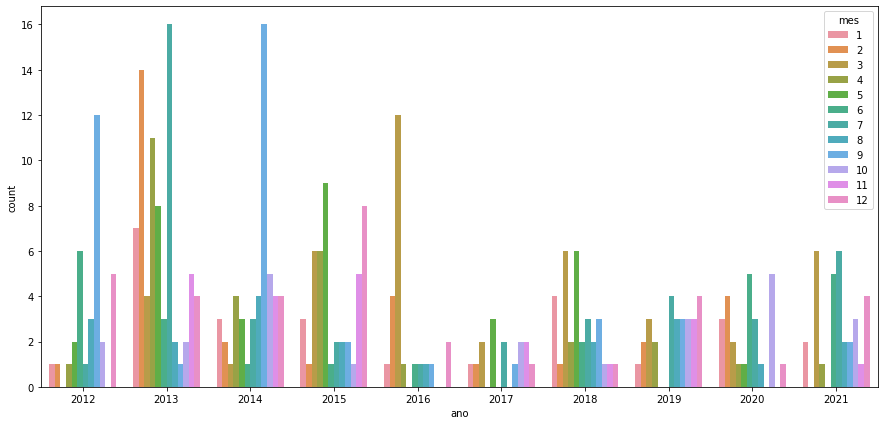

In [304]:
plt.figure(figsize=(15, 7))

sns.countplot(data =df_aeronaves_9_anos, x ='ano', hue='mes')
# sns.countplot(y=df_ocorrecias['ocorrencia_uf'] )


<AxesSubplot:title={'center':'Tipos de acidentes mais comuns para aeronaves de 9 anos'}>

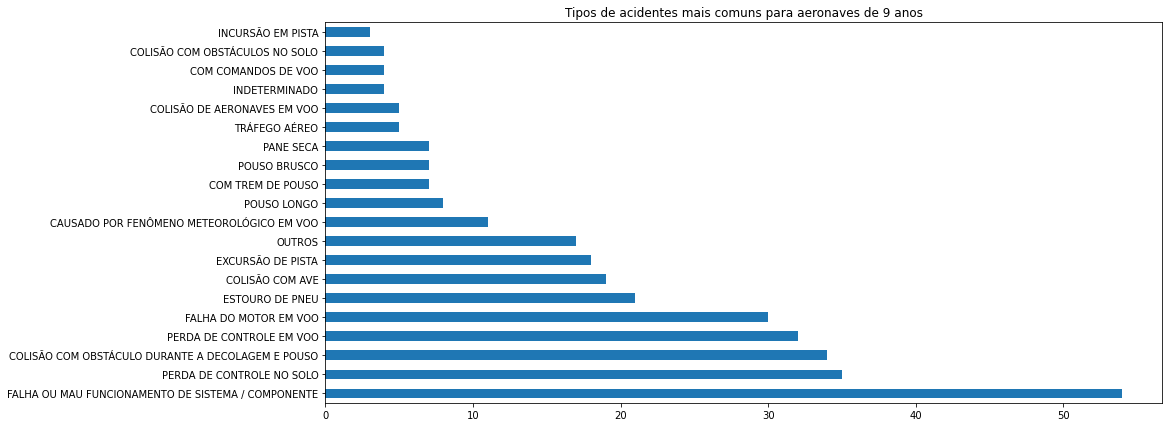

In [331]:
plt.figure(figsize=(15, 7))

df_aeronaves_9_anos.ocorrencia_tipo.value_counts().head(20).plot(kind = 'barh',title = "Tipos de acidentes mais comuns para aeronaves de 9 anos")

Consolidando o que foi visto durante a exploração da base de aeronaves e agora conseguimos definir o perfil de ocorrencias para aeronaves de 9 anos:
- Fabricados em 2012
- Avioes,Bimotores
- Fabircados pela empresas EMBRAER e AEROSPATIALE AND ALENI
- Tiveram picos de ocorrencias no ano de sua produção e nos 2 anos seguintes
- A maior causa de acidentes foi mal funcionamento do sistema
- Seguidos por perda de controle da aeronave e colisões 

Perda de controle da aeronave e colisões como vistos na base de fatores associados, estão ligados diretamente a fatores operacionais e dificuldades dos pilotos em controlar a aeronave.

----

Encerro aqui minha etapa de exploração da base, espero ter oferecido uma boa dimensão de quais dados estão disponíveis e o que é possivel descobrir com eles.

Um ponto importante é que não ma ative a processos de limpeza de dados, a ideia aqui foi mostrar o que a base "crua" poderia informar e deixar esta etapa para outro momento, como durante a preparação dos dados para modelagem.

### Próximos passos

Após a uniao das bases é possivel realizar relacionamentos interessantes como:
- a participacao de aspectios psicológicos e operacionais em acidentes graves
- relacionamentos entre o tipo de ocorrencia, o fabricante da eronave e o nível de dano
- A base viabiliza muitas visualizalções interessantes, que funcionariam melhor em um painel de BI devido a grande quantidade de classes e relacionamentos possíveis
- Tambem seria possível cirar um modelo classificatório para tentar prever a classificacao da ocorrencia(INCIDENTE,ACIDENTE OU ACIDENTE GRAVE). Embora esta etapa necessite de maior cuidado pela grande quantidade de premissas categoricas e de categorias. Esta característica adicionaria muita esparsidade nos dados utilizando onehot enconder ou criaria uma relacao ordinal que nao existe na base através do label encode. Desta forma seria necessário um esforço maior para definir que tipo de enconde se adequa a estes dados sem criar problemas  na modelagem.
